In [1]:
# Import your data into a Pandas DataFrame.
# Merge your DataFrames.
# Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.
# Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for three city types.
# Determine the mean, median, and mode for the following:
# ###The total number of rides for each city type.
# ###The average fares for each city type.
# ###The total number of drivers for each city type.

# Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
# ###The number of rides for each city type.
# ###The fares for each city type.
# ###The number of drivers for each city type.

# Create a pie chart that visualizes each of the following data for each city type:
# ###The percent of total fares.
# ###The percent of total rides.
# ###The percent of total drivers.

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
# Read the city data file and store it in a pandas DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the ride data file and store it in a pandas DataFrame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2018-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2018-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2018-04-26 00:43:24,35.98,111953927754
8,South Karenland,2018-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2018-03-09 06:26:29,42.81,5327642267789


In [6]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Data types
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Unique cities TYPE
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Number of points from Urban
sum(city_data_df["type"] == "Urban")
# sum(city_data_df["type"] == "Suburban")
# sum(city_data_df["type"] == "Rural")

66

In [11]:
# Inspect Ride Data DataFrame
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
# Merge
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2018-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2018-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2018-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2018-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2018-05-06 08:57:56,51.80,4018025271936,2,Rural


In [16]:
# 5.3.2
# Get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [17]:
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [18]:
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [19]:
# Get average fare for each city in the urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [20]:
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [21]:
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [22]:
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [23]:
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [24]:
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

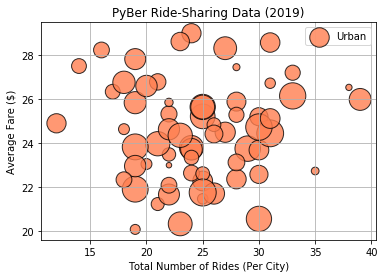

In [25]:
plt.scatter(urban_ride_count, 
            urban_avg_fare,
           s=urban_driver_count*10,
           color="coral",
           edgecolor="black",
           linewidths=1,
           alpha=0.8,
           label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

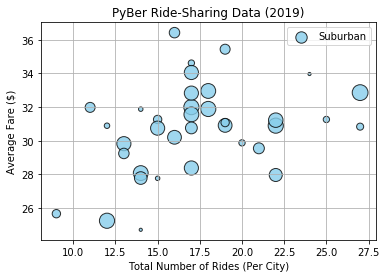

In [26]:
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
           s=suburban_driver_count*10,
           color="skyblue",
           edgecolor="black",
           linewidths=1,
           alpha=0.8,
           label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

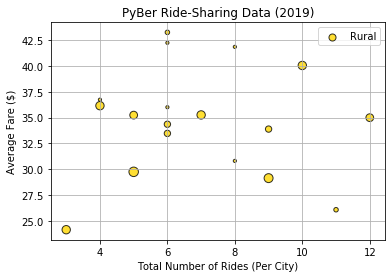

In [27]:
plt.scatter(rural_ride_count, 
            rural_avg_fare,
           s=rural_driver_count*10,
           color="gold",
           edgecolor="black",
           linewidths=1,
           alpha=0.8,
           label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

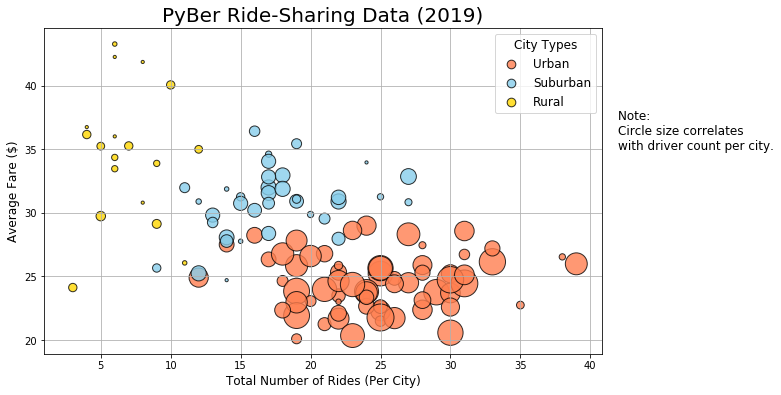

In [28]:
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, urban_avg_fare,
           s=urban_driver_count*10,
           color="coral", alpha=0.8,
           edgecolor="black", linewidths=1,
           label="Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare,
           s=suburban_driver_count*10,
           color="skyblue", alpha=0.8,
           edgecolor="black", linewidths=1,
           label="Suburban")

plt.scatter(rural_ride_count, rural_avg_fare,
           s=rural_driver_count*10,
           color="gold", alpha=0.8,
           edgecolor="black", linewidths=1,
           label="Rural")

# Overall properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)
# Legend
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(12)

plt.text(42,35, "Note: \nCircle size correlates\nwith driver count per city.", fontsize="12")

plt.savefig("Analysis/Fig1.png")
plt.show()

In [29]:
# 5.4.1
#urban_ride_count.describe()
#suburban_ride_count.describe()
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [30]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [31]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [32]:
# Calculate the mode of the ride count for each city type.
#urban_ride_count.mode()
suburban_ride_count.mode()
#rural_ride_count.mode()

0    17
dtype: int64

In [33]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [34]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [35]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for urban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for urban trips is 17.36.
The median for the ride counts for urban trips is 17.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([17]), count=array([7])).


In [36]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for urban trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_rural_ride_count}.")

The mean for the ride counts for urban trips is 6.94.
The median for the ride counts for urban trips is 6.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([6]), count=array([5])).


In [37]:
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]
urban_fares

0       13.83
1       30.24
2       33.44
3       23.44
4       34.58
        ...  
1620    39.40
1621    32.05
1622    38.53
1623     7.63
1624    27.57
Name: fare, Length: 1625, dtype: float64

In [38]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [41]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean for the ride counts for urban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median for the ride counts for urban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode for the ride counts for urban trips is {mode_suburban_fares}.")

The mean for the ride counts for urban trips is $30.97.
The median for the ride counts for urban trips is $30.75.
The mode for the ride counts for urban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [42]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean for the ride counts for urban trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median for the ride counts for urban trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode for the ride counts for urban trips is {mode_rural_fares}.")

The mean for the ride counts for urban trips is $34.62.
The median for the ride counts for urban trips is $37.05.
The mode for the ride counts for urban trips is ModeResult(mode=array([37.05]), count=array([2])).


In [43]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [44]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_driver_count = np.mean(urban_drivers)
print(f"The mean drivers per urban city is {mean_urban_driver_count:.0f}.")

median_urban_driver_count = np.median(urban_drivers)
print(f"The median drivers per urban city is {median_urban_driver_count:.2f}.")

mode_urban_driver_count = sts.mode(urban_drivers)
print(f"The modal drivers per urban city is {mode_urban_driver_count}.")

The mean drivers per urban city is 37.
The median drivers per urban city is 37.00.
The modal drivers per urban city is ModeResult(mode=array([39]), count=array([86])).


In [45]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_suburban_driver_count = np.mean(suburban_drivers)
print(f"The mean drivers per suburban city is {mean_suburban_driver_count:.0f}.")

median_suburban_driver_count = np.median(suburban_drivers)
print(f"The median drivers per suburban city is {median_suburban_driver_count:.2f}.")

mode_suburban_driver_count = sts.mode(suburban_drivers)
print(f"The modal drivers per suburban city is {mode_suburban_driver_count}.")

The mean drivers per suburban city is 14.
The median drivers per suburban city is 16.00.
The modal drivers per suburban city is ModeResult(mode=array([20]), count=array([79])).


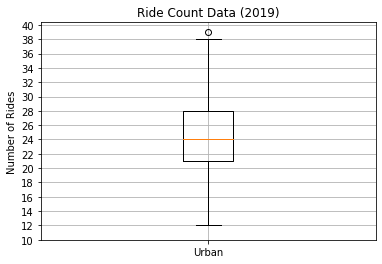

In [46]:
#5.4.4 (BOX & WHISKER)
# Box & Whisker plot for the urban cities ride count
x_labels = ["Urban"]
fig,ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

#Add thte title, y-axis label and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()


In [47]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

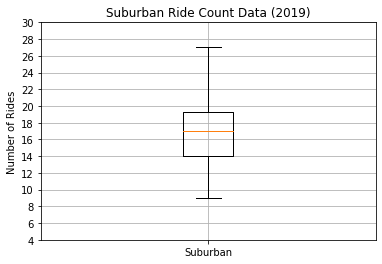

In [48]:
# Box & Whisker plot for the suburban cities ride count
x_labels = ["Suburban"]
fig,ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

#Add thte title, y-axis label and grid
ax.set_title("Suburban Ride Count Data (2019)")
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(4, 31, step=2.0))
ax.grid()
plt.show()


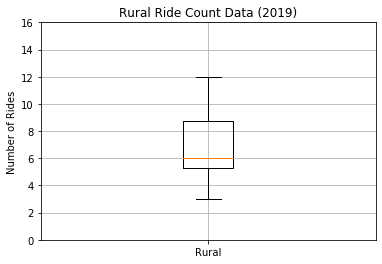

In [49]:
# Box & Whisker plot for the suburban cities ride count
x_labels = ["Rural"]
fig,ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

#Add thte title, y-axis label and grid
ax.set_title("Rural Ride Count Data (2019)")
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 17, step=2.0))
ax.grid()
plt.show()

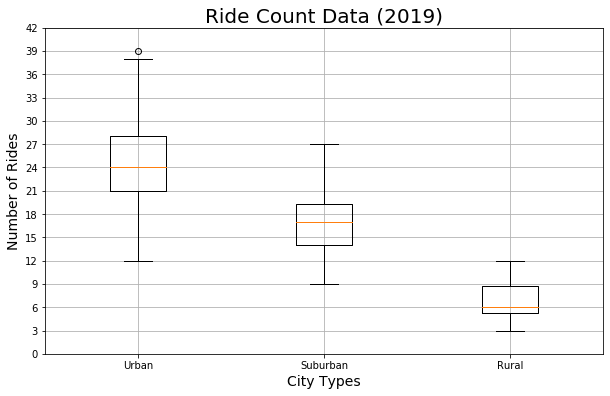

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [50]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()
urban_ride_count.describe()

In [51]:
#Find the outlier
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
urban_city_outlier

'West Angela'

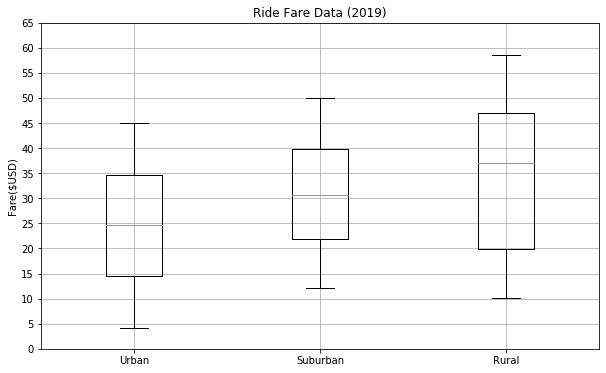

In [52]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban", "Suburban", "Rural"]
fare_Data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize = (10, 6))
ax.boxplot(fare_Data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 66, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

#print("Summary Statistics")
#urban_fares.describe()

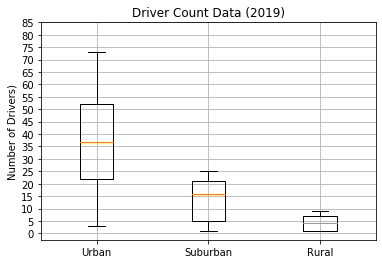

In [53]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban", "Suburban", "Rural"]
driver_Count_Data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots()
ax.boxplot(driver_Count_Data,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.savefig("analysis/Fig4.png")
plt.show()

In [55]:
# 5.5.1 - Percentages
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [58]:
# Sum of all the fares
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [59]:
#Calculate percentage of fare for each city type
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [60]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

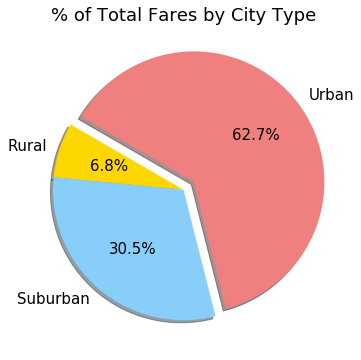

In [77]:
# Import mpl to change the plot configurations using rcParams
import matplotlib as mpl

# Build Pie Chart
plt.subplots(figsize=(10,6))
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"],
       colors = ["gold", "lightskyblue", "lightcoral"],
       explode = [0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Parameter stuff - Change default font size from 10 to 15
mpl.rcParams['font.size'] = 15
# Save Figure
plt.savefig("analysis/Fig5.png")
plt.show()

In [95]:
#5.6.1 - Calculate Ride Percentages
#Get the total number of rides for each city type.
#Get the total rides for all the city types.
#Calculate the percentage of the total rides for each city type.

total_rides = pyber_data_df["ride_id"].count()
total_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
ride_percents = 100 * total_rides_by_type / total_rides
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64